In [4]:
import pandas as pd

In [5]:
with open('C:\\Users\\xbox2\\Dropbox\\Development\\sentiment\\reddit-comments.json', 'rb') as f:
    data = f.readlines()
    
data = map(lambda x: x.rstrip(), data)

data_json_str = "[" + ','.join(data) + "]"

data_df = pd.read_json(data_json_str)

In [6]:
  data_df

,archived,author,author_flair_css_class,author_flair_text,body,controversiality,created_utc,distinguished,downs,gilded,id,link_id,name,parent_id,retrieved_on,score,score_hidden,subreddit,subreddit_id,ups
0,NaN,Van_Herenhuis,None,None,How there are different kinds of epileptics th...,0,1490180032,None,NaN,1,df97q2c,t3_60tvvm,NaN,t3_60tvvm,1491690385,8894,NaN,AskReddit,t5_2qh1i,NaN
1,NaN,Abaddon_Jones,None,None,My bro did a very similar thing back in compre...,0,1488404127,None,NaN,0,dedwikl,t3_5wynp1,NaN,t3_5wynp1,1491125814,6816,NaN,tifu,t5_2to41,NaN
2,NaN,t_rex_arms_444,None,None,"Aghhhh NOOO, I'm ashamed all over again. I had...",0,1489078148,None,NaN,0,deppb2l,t3_5yfdiz,NaN,t1_depjztj,1491343778,1676,NaN,AskReddit,t5_2qh1i,NaN
3,NaN,Van_Herenhuis,None,None,It's cool. Most of my having to explain comes ...,0,1490181989,None,NaN,0,df98gwp,t3_60tvvm,NaN,t1_df98g66,1491690747,983,NaN,AskReddit,t5_2qh1i,NaN
4,NaN,CapRodgers,None,None,"Harrison Ford, he auctioned his The Force Awak...",0,1490716990,None,NaN,0,dfin1qq,t3_61yoko,NaN,t3_61yoko,1491854864,675,NaN,AskReddit,t5_2qh1i,NaN
5,NaN,_OldBay,None,None,"As someone with epilepsy, this is some scary s...",0,1489541048,None,NaN,0,dexw29d,t3_5zg77b,NaN,t3_5zg77b,1491486529,596,NaN,news,t5_2qh3l,NaN
6,NaN,LlamasInLingerie,None,None,I'm really glad to hear that it's working for ...,0,1489129357,None,NaN,0,deqtx6k,t3_5yk8yt,NaN,t3_5yk8yt,1491363459,584,NaN,Futurology,t5_2t7no,NaN
7,NaN,KHFanboy,None,None,"As someone with epilepsy, his analogy is prett...",0,1489876531,None,NaN,0,df3wjae,t3_605mu7,NaN,t1_df3tfqh,1491597864,414,NaN,WTF,t5_2qh61,NaN
8,NaN,ichdru21,None,None,"&gt; * At some point in their lives, 1 in 6 ch...",0,1490031741,None,NaN,0,df6icnn,t3_60fllq,NaN,t1_df6827m,1491643229,413,NaN,AskReddit,t5_2qh1i,NaN
9,NaN,JoLLand713,None,None,"Oh Jeff you old prick. Yes, let's keep on spen...",0,1489606704,None,NaN,0,dez1d1g,t3_5zlct1,NaN,t3_5zlct1,1491506562,405,NaN,nottheonion,t5_2qnts,NaN


In [8]:
import graphlab
graphlab.canvas.set_target('ipynb')

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
reddit_data = graphlab.SFrame(data_df)

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\xbox2\AppData\Local\Temp\graphlab_server_1492781002.log.0


This non-commercial license of GraphLab Create for academic use is assigned to na and will expire on April 21, 2018.


In [12]:
reddit_data = graphlab.SFrame(data_df)
import time
import datetime
reddit_data['Comment Date'] = reddit_data.apply(lambda row: (datetime.datetime.fromtimestamp(row['created_utc'])).date())

In [13]:
reddit_data.show(view="Bar Chart", x="Comment Date")

In [56]:
with open('C:\\Users\\xbox2\\Downloads\\reddit_epilepsy_adjectives.json', 'rb') as f:
    data = f.readlines()
    
data = map(lambda x: x.rstrip(), data)

data_json_str = "[" + ','.join(data) + "]"

data_df = pd.read_json(data_json_str)

In [57]:
reddit_adjective_data = graphlab.SFrame(data_df)

In [58]:
reddit_adjective_data

adj_count,tokens_text_content
539,other
370,more
301,medical
289,good
271,many
237,sure
230,different
221,first
212,bad
209,few


In [38]:
reddit_adjective_data.show(view='Bar Chart', x="tokens_text_content")

In [53]:
reddit_adjective_data['tokens_text_content'].show()

In [42]:
reddit_adjective_data.show(view="Bar Chart")

In [43]:
reddit_adjective_data

tokens_text_content
different
popular
rarest
confusing
Epileptic
violent
conscious
afraid
ashamed
terrifying


In [46]:
import graphlab.aggregate as agg
adj_count = reddit_adjective_data.groupby(key_columns='tokens_text_content',
            operations={'count': agg.COUNT()})

In [47]:
adj_count

tokens_text_content,count
unstable,2
costly,3
open,30
darkened,1
misinformed,1
neutral,4
puzzled,1
abhorrent,1
inclined,2
decent,12


In [50]:
adj_count.sort('count')
adj_count.show(view="Bar Chart")


In [59]:
reddit_adjective_data

adj_count,tokens_text_content
539,other
370,more
301,medical
289,good
271,many
237,sure
230,different
221,first
212,bad
209,few


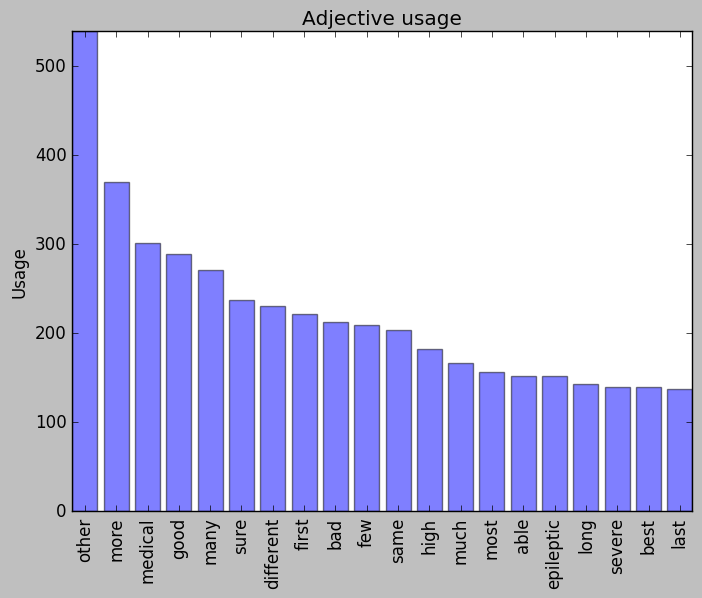

In [100]:
import numpy as np
plt.rcdefaults()
reddit_adjective_data.dropna()
objects = reddit_adjective_data['tokens_text_content']
y_pos = np.arange(len(objects))
performance = reddit_adjective_data['adj_count']

plt.bar(y_pos, performance, alpha=0.5, align="center")
plt.xticks(y_pos, objects, rotation="vertical", ha="center")
plt.ylabel('Usage')
plt.title('Adjective usage')
 
plt.axis('tight')

plt.show()

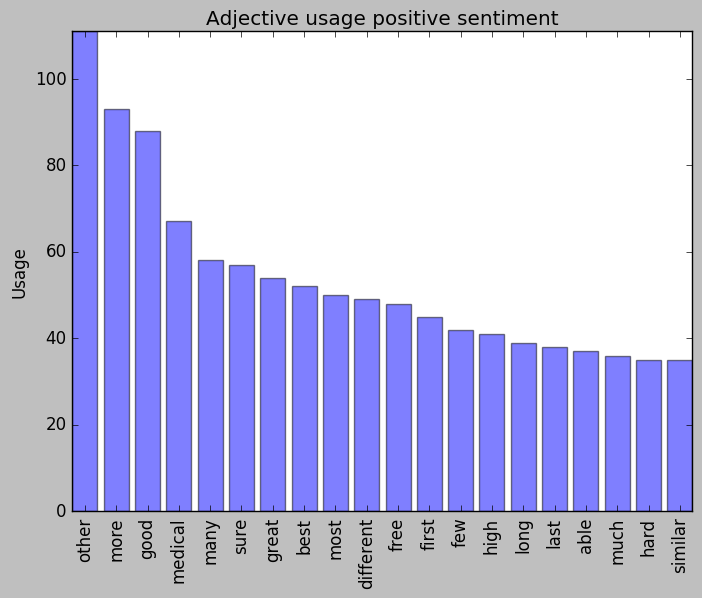

In [102]:
with open('C:\\Users\\xbox2\\Downloads\\results-20170421-pos.json', 'rb') as f:
    data = f.readlines()
    
data = map(lambda x: x.rstrip(), data)

data_json_str = "[" + ','.join(data) + "]"

data_df = pd.read_json(data_json_str)

reddit_adjective_pos_data = graphlab.SFrame(data_df)

plt.rcdefaults()
reddit_adjective_data.dropna()
objects = reddit_adjective_pos_data['tokens_text_content']
y_pos = np.arange(len(objects))
performance = reddit_adjective_pos_data['adj_count']

plt.bar(y_pos, performance, alpha=0.5, align="center")
plt.xticks(y_pos, objects, rotation="vertical", ha="center")
plt.ylabel('Usage')
plt.title('Adjective usage positive sentiment')
 
plt.axis('tight')

plt.show()

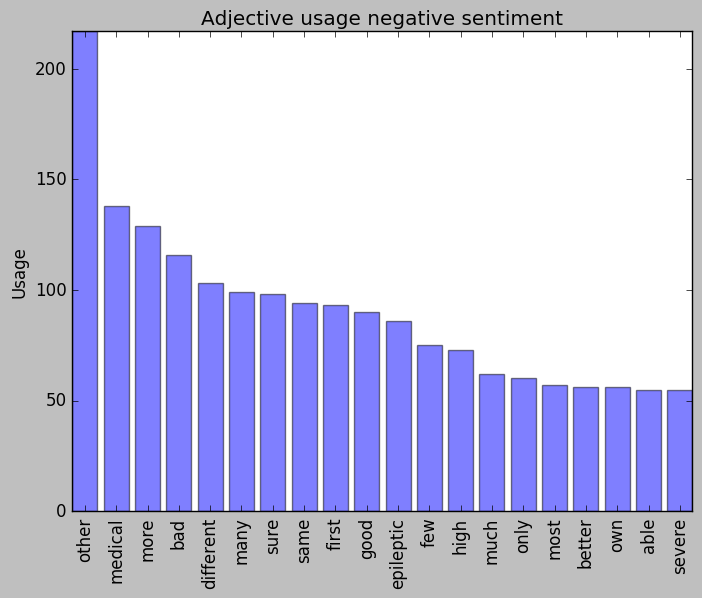

In [105]:
with open('C:\\Users\\xbox2\\Downloads\\results-20170421-neg.json', 'rb') as f:
    data = f.readlines()
    
data = map(lambda x: x.rstrip(), data)

data_json_str = "[" + ','.join(data) + "]"

data_df = pd.read_json(data_json_str)

reddit_adjective_neg_data = graphlab.SFrame(data_df)

plt.rcdefaults()
reddit_adjective_neg_data.dropna()
objects = reddit_adjective_neg_data['tokens_text_content']
y_pos = np.arange(len(objects))
performance = reddit_adjective_neg_data['adj_count']

plt.bar(y_pos, performance, alpha=0.5, align="center")
plt.xticks(y_pos, objects, rotation="vertical", ha="center")
plt.ylabel('Usage')
plt.title('Adjective usage negative sentiment')
 
plt.axis('tight')

plt.show()

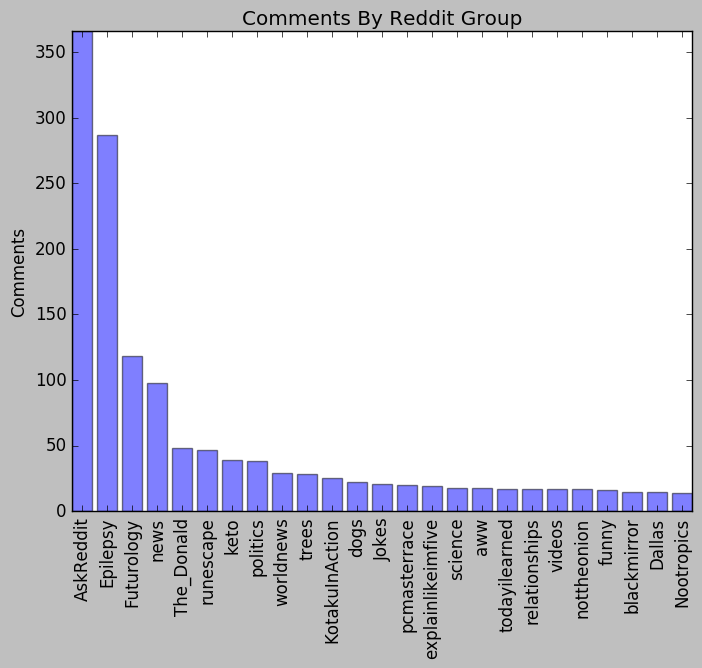

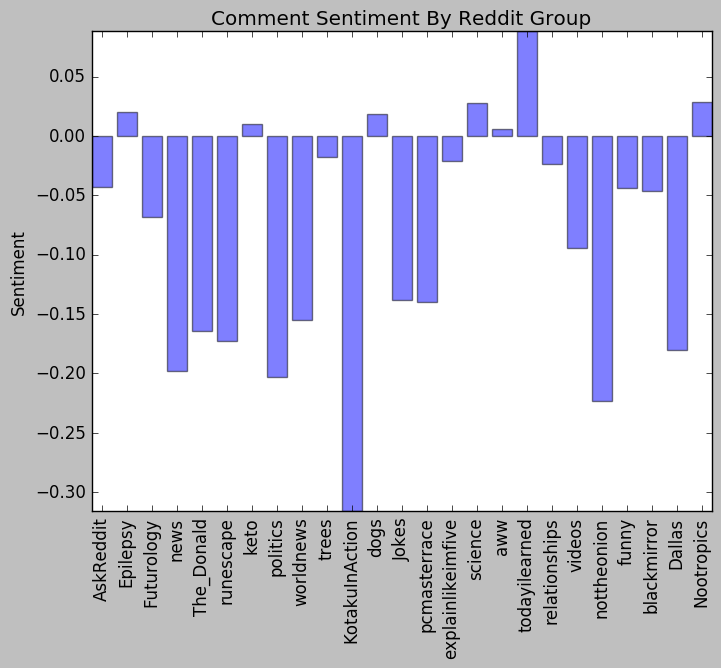

In [117]:
with open('C:\\Users\\xbox2\\Downloads\\reddit_subreddit_group.json', 'rb') as f:
    data = f.readlines()
    
data = map(lambda x: x.rstrip(), data)

data_json_str = "[" + ','.join(data) + "]"

data_df = pd.read_json(data_json_str)

reddit_adjective_pos_data = graphlab.SFrame(data_df)
reddit_adjective_pos_data = reddit_adjective_pos_data.topk('comment_count',k=25)
plt.rcdefaults()
reddit_adjective_data.dropna()
objects = reddit_adjective_pos_data['subreddit']
y_pos = np.arange(len(objects))
performance = reddit_adjective_pos_data['comment_count']
avg_score = reddit_adjective_pos_data['avg_score']

plt.bar(y_pos, performance, alpha=0.5, align="center")
plt.xticks(y_pos, objects, rotation="vertical", ha="center")
plt.ylabel('Comments')
plt.title('Comments By Reddit Group')
 
plt.axis('tight')

plt.show()

plt.ylabel('Sentiment')
plt.title('Comment Sentiment By Reddit Group')
plt.xticks(y_pos, objects, rotation="vertical", ha="center")
plt.bar(y_pos, avg_score, alpha=0.5, align="center")
plt.axis('tight')
plt.show()


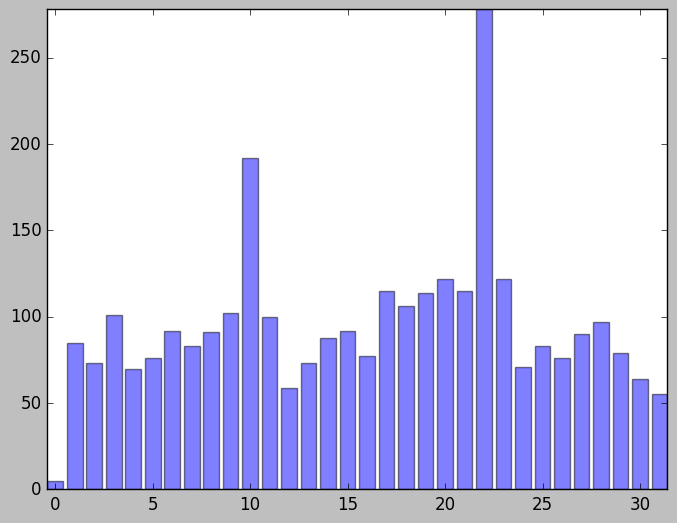

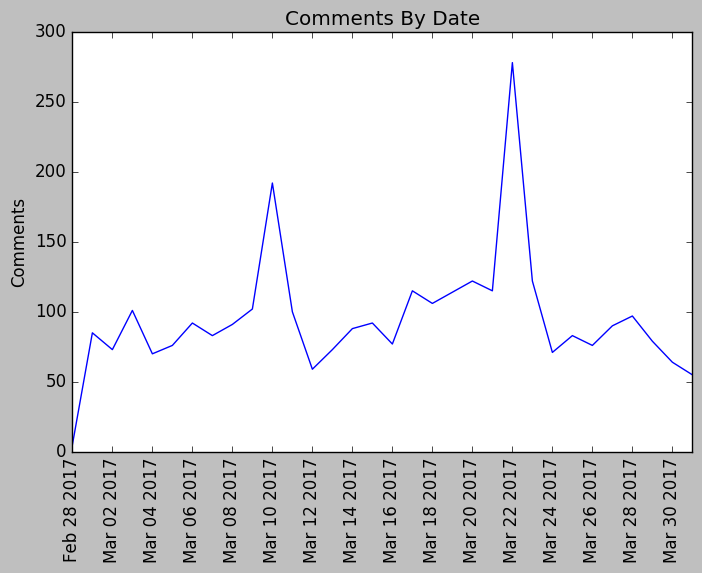

In [180]:
with open('C:\\Users\\xbox2\\Dropbox\\Development\\sentiment\\reddit-comments.json', 'rb') as f:
    data = f.readlines()
    
data = map(lambda x: x.rstrip(), data)

data_json_str = "[" + ','.join(data) + "]"

data_df = pd.read_json(data_json_str)

reddit_data = graphlab.SFrame(data_df)
import time
import datetime
reddit_data['Comment Date'] = reddit_data.apply(lambda row: (datetime.datetime.fromtimestamp(row['created_utc'])).date())

import graphlab.aggregate as agg
comments_by_month = reddit_data.groupby(key_columns='Comment Date',
            operations={'count': agg.COUNT()})
comments_by_month.sort('count')  
plt.rcdefaults()
comments_by_month.dropna()

comments_by_month = comments_by_month.sort('Comment Date')
objects = comments_by_month['Comment Date']
y_pos = np.arange(len(objects))
performance = comments_by_month['count']

from matplotlib.dates import DateFormatter

plt.bar(y_pos, performance, alpha=0.5, align="center")
 
plt.axis('tight')

import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots()
ax.plot(comments_by_month['Comment Date'],comments_by_month['count'])

ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
# ax.format_ydata = price
ax.grid(False)
# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()
plt.xticks(rotation=90, ha="center")
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
plt.ylabel('Comments')
plt.title('Comments By Date')

plt.show()

In [131]:
comments_by_month

Comment Date,count
2017-02-28 00:00:00,5
2017-03-01 00:00:00,85
2017-03-02 00:00:00,73
2017-03-03 00:00:00,101
2017-03-04 00:00:00,70
2017-03-05 00:00:00,76
2017-03-06 00:00:00,92
2017-03-07 00:00:00,83
2017-03-08 00:00:00,91
2017-03-09 00:00:00,102


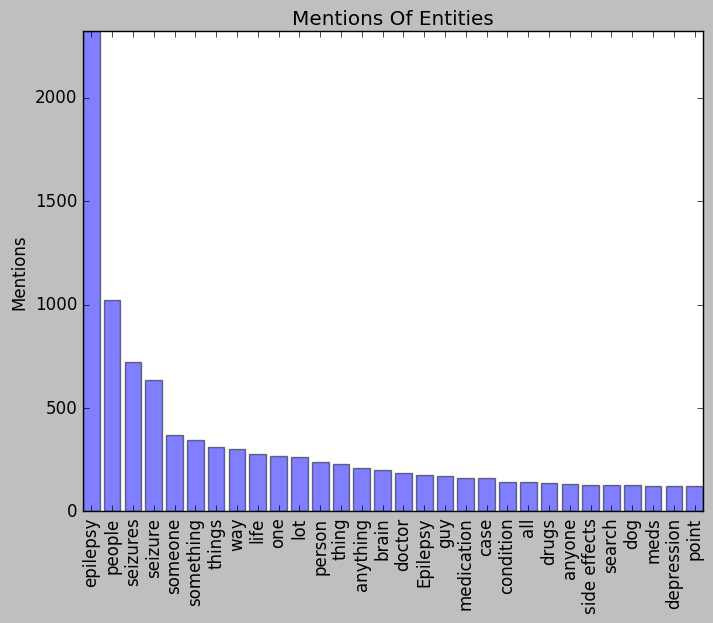

In [185]:
with open('C:\\Users\\xbox2\\Downloads\\epilepsy_entities2.json', 'rb') as f:
    data = f.readlines()
    
data = map(lambda x: x.rstrip(), data)

data_json_str = "[" + ','.join(data) + "]"

data_df = pd.read_json(data_json_str)

reddit_adjective_pos_data = graphlab.SFrame(data_df)
reddit_adjective_pos_data = reddit_adjective_pos_data.topk('usage_count',k=30)
plt.rcdefaults()
reddit_adjective_data.dropna()
objects = reddit_adjective_pos_data['entities_name']
y_pos = np.arange(len(objects))
performance = reddit_adjective_pos_data['usage_count']

plt.bar(y_pos, performance, alpha=0.5, align="center")
plt.xticks(y_pos, objects, rotation="vertical", ha="center")
plt.ylabel('Mentions')
plt.title('Mentions Of Entities')
 
plt.axis('tight')

plt.show()
